# Project using linear regression to predict Medical Expenses
This project consists of creating a system to estimate the annual medical expenditure for new patients using the following information:
* Age
* Sex
* BMI
* Children
* Smoking habits
* Region
* Residence

With this system, you will be able to determine the annual insurance premium offered to the customer.

# Importing the libraries required

In [2]:
import pandas as pd
import numpy as np


# For exploratory analysis and visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Bringing the data


In [3]:
data_url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"
medical_data = pd.read_csv(data_url)

In [4]:
medical_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


According to the dataset, it contains 1338 customer and 7 features about them.
We want to find a way to estimate the value in "charges" based on the other characteristics. We analyze the historical data, then we should able to estimate charges for new customers, by asking information like age, sex, BMI, number of children, smoking habits and region.

## Data type for each column:

In [5]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The features with numeric data type are: "age", "bmi", "children" and "charges". "Sex", "smoker" and "region" are strings. There no missing values.
## Statistics of numerical features:

In [6]:
medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The data has reasonable values (all data is positive and within an acceptable range). A point to consider is that the charges in the 50% is much lower than the maximum value. The same thing happens for the number of children.

# Exploratory analysis and Visualization

Let's check the data by visualizing the distribution of of values and the relationship between our target feature and the other columns.

## Age
Age is a numeric column. The mean age is 39.207 years, the minimum age is 18 and the maximum age is 64. There are 47 different ages in the dataset, therefore we can visualize the distribution of this feature with a histogram with 47 bins and a box plot too. 

In [7]:
medical_data.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

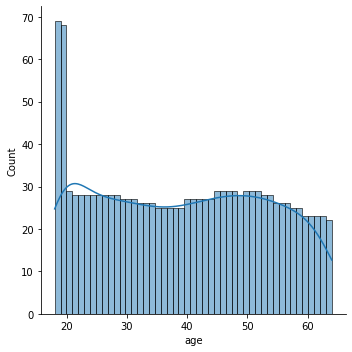

In [8]:
matplotlib.rcParams['figure.figsize'] = (20, 20)
sns.displot(data = medical_data.age, kde = True, bins = 47)
plt.show()

The distribution of ages is almost uniform, with an number of customers of approximately 30 per year, except before 20 which is close to 70. This tells us that there isn't a big variation in the number of people of any given age.

## Body Mass Index (BMI)
The distribution of BMI is the following:

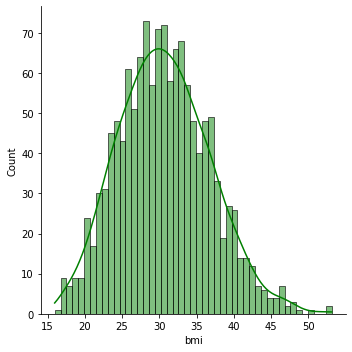

In [9]:
sns.displot(data = medical_data.bmi, kde = True, bins = 47, color = "green")
plt.show()

The distribution is seems Gaussian centered around the value 30, it has a few outliers towards the right.

BMI values can be interpreted as:

* < 18.5: underweight
* 18.5-24.9: normal-weight
* 25-29.9: overweight 
* 30-39.9: obesity
* $> 40$: morbid obesity


## Smoker
This feature contains the values "yes" and "no", so we are going to visualize the distribution using a histogram. We divide it by sex.

First, the number of smokers and non-smokers is 274 and 1064, respectively:

In [10]:
medical_data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

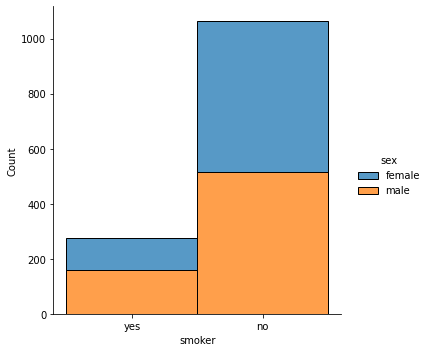

In [11]:
sns.displot(data = medical_data, x = "smoker", hue="sex", multiple="stack")
plt.show()

In [12]:
print("{:.3f}% of customers have reported that they smoke".format(274/(1064+274)*100))

20.478% of customers have reported that they smoke


## Sex
The number of men and women in the dataset is 676 and 662, respectively. Then, There are practically the same number of women as men.

In [13]:
medical_data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

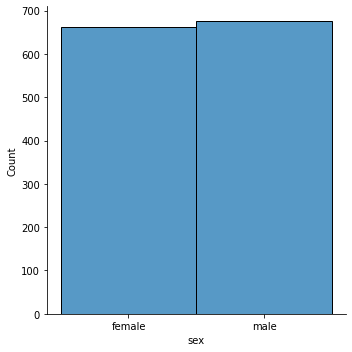

In [14]:
sns.displot(data=medical_data, x = "sex")
plt.show()

## Region
This characteristic has a uniform distribution with a value of 325 customers approximately. The southeast has the highest value with 364 customers.

In [15]:
medical_data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

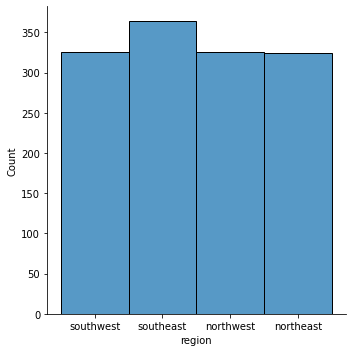

In [16]:
sns.displot(medical_data, x = "region")

## Children
The majority of customers do not have children (574), then the number decreases as the number of children increases. 324 customers have 1 child, 240 customers have 2 children, 157 have 3 children.

In [17]:
medical_data.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

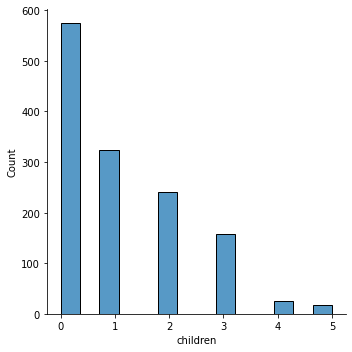

In [18]:
sns.displot(medical_data, x = "children")

## Charges 
This is the feature we are trying to predict. Let's visualize the distribution of "charges" and we also use the categorical columns to distinguish the charges with respect to the other characteristics.

### Charges vs smoker

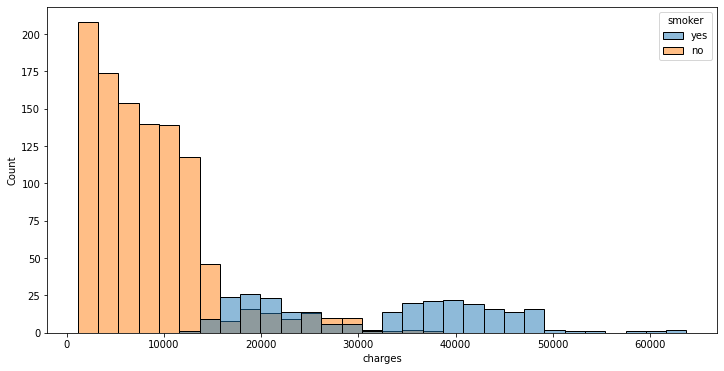

In [19]:
plt.figure(figsize =(12,6))
sns.histplot(data = medical_data, x = "charges", hue = "smoker")
plt.show()

Observations:
* The largest number of customers have a Annual medical charges of less than $10000. A small fraction of custumers have higher medical charges than that number. The distribution follows a "power law".
* Almost all non-smokers correspond to consumers with Annual medical charges less than $10000. Smokers have charges between $20000 and $50000.

### Charges vs sex


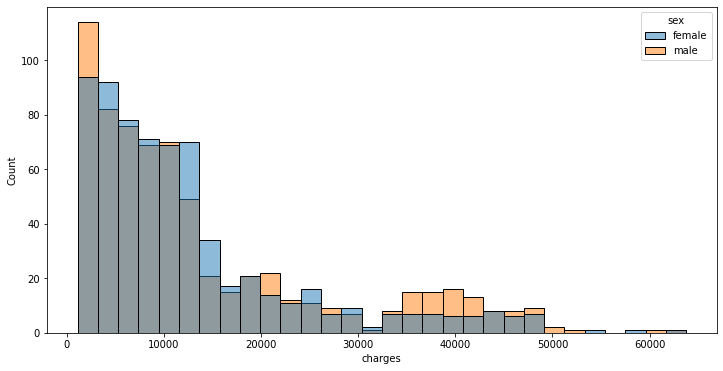

In [20]:
plt.figure(figsize =(12,6))
sns.histplot(data = medical_data, x = "charges", hue = "sex")
plt.show()

Observations:
* The distribution follows a "power law".
* Between men and women there is almost no difference in the charges they present. Only in charges between $30000 and $50000 is ther a small increase in the number of men.

### Charges and Age
Let's check the relationship between "charges" and "age" using a scatter plot. Each point represents one costumer. We use values in the "smoker" column to color the points.

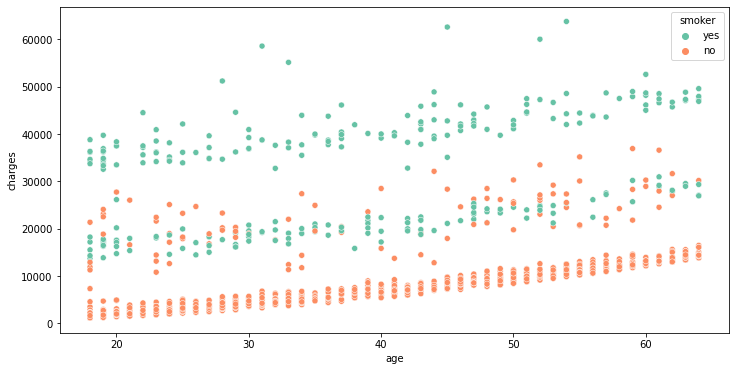

In [21]:
plt.figure(figsize =(12,6))
sns.scatterplot(data = medical_data, x = "age", y = "charges", hue = "smoker", palette="Set2")
plt.show()

Observations about the chart:
* As we might expect, there is a trend that looks like that medical charges increase with age, but at each age there is significant variation, therefore, the age is not a parameter that can be used alone to determine medical charges.
* There are three clusters of points with an increasing slope, these are:
    * The first and largest cluster cluster consists of non-smokers who have low medical charges in relation to the others (Orange).
    * The second cluster contains both smokers and non-smokers. These may actually be two distinct but overlapping clusters: "non-smokers with medical problems" and "smokers without major medical problems".
    * The third cluster consists of consists of smokers, these can be smokers with major medical issues related to smoking.

### Charges vs BMI
We use another scatter plot to visualise the relationship between BMI and charges. The "smoker" column is also used to color the points.

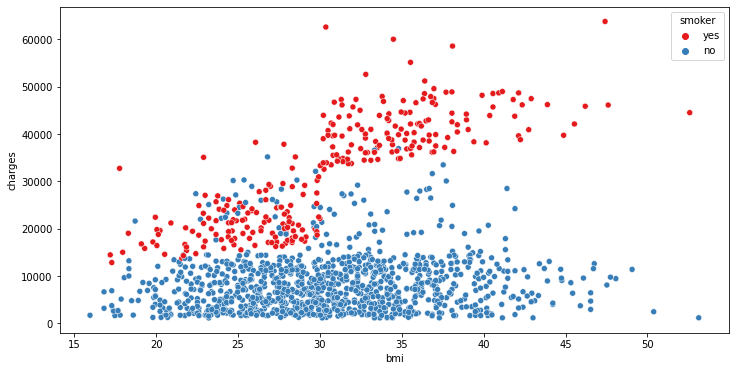

In [22]:
plt.figure(figsize =(12,6))
sns.scatterplot(data = medical_data, x = "bmi", y = "charges", hue = "smoker", palette="Set1")
plt.show()

It seems that for non-smokers there is no relationship with BMI; an increase in BMI does not seem to be related to an increase in medical charges. Nevertheless, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

## Correlation
As we have seen from the analysis, some columns are more closely relatred to the values in "charges"; "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

The correlation coefficient between charges and age has the following value:

In [23]:
medical_data.charges.corr(medical_data.age)

0.2990081933306478

The correlation coefficient between charges and BMI has the following value:

In [24]:
medical_data.charges.corr(medical_data.bmi)

0.19834096883362887

We can see that the correlation of charges with age is greater than with BMI.\\

To compute the correlation of age between all pairs of numerical columns we can use pandas dataframes.

In [25]:
medical_data.corr()

C:\Users\Alanr\AppData\Local\Temp/ipykernel_1848/357147094.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  medical_data.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


We can visualize using a heatmap:

C:\Users\Alanr\AppData\Local\Temp/ipykernel_1848/1089349626.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(medical_data.corr(), cmap = "Reds", annot=True)


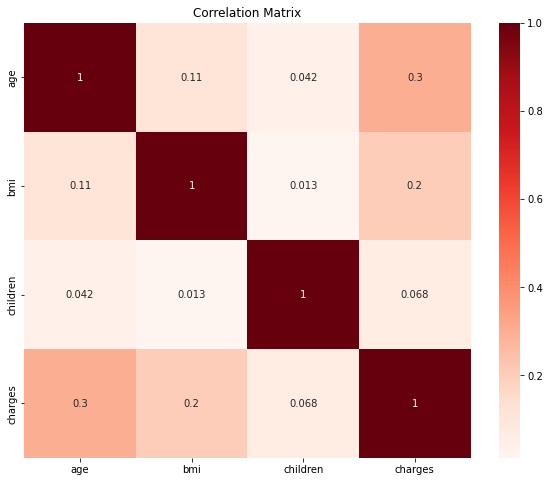

In [26]:
plt.figure(figsize =(10,8))
sns.heatmap(medical_data.corr(), cmap = "Reds", annot=True)
plt.title("Correlation Matrix")
plt.show()

# Linear Regression using a Single Feature

"Smoker" and "age" have the strongest correlation with "charges". Let's find a way of estimating the value of "charges" using the value of "age" for non-smokers.

In [27]:
medical_non_smoker = medical_data[medical_data.smoker == "no"]

Let's visualize the relationship between "age" and "charges".

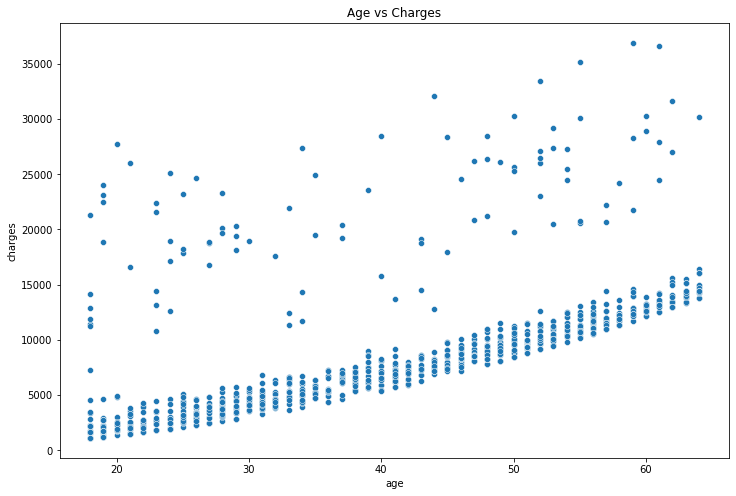

In [28]:
plt.figure(figsize=(12,8))
plt.title("Age vs Charges")
sns.scatterplot(data = medical_non_smoker, x = "age", y = "charges")
plt.show()

The points seems to form a line. We use a line to predict charges for a given age. The line has the following formula:

$y = \omega x + b$



## Model
The line applied to our case, the x axis shows "age" and y axis shows "charges". Thus:

$charges = \omega \times age + b$

We create a function called $estimate$ $charges$, to compute $charges", given $age, \omega$ and $b$.

In [29]:
def estimate_charges(age, w, b):
    return w*age + b


Let's guess the values for $\omega$ and $b$ and use them to estimate the value for charges.

In [30]:
w = 50
b = 100
ages = medical_non_smoker.age
estimated_charges = estimate_charges(ages, w, b)

Let's plot the estimated charges using a line graph.

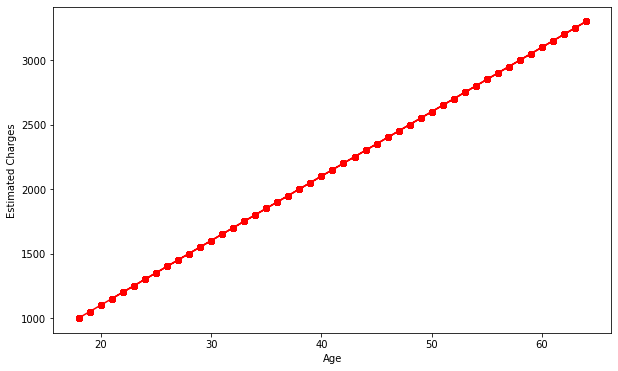

In [31]:
plt.figure(figsize=(10,6))
plt.plot(ages, estimated_charges, "r-o")
plt.xlabel("Age")
plt.ylabel("Estimated Charges")
plt.show()

The points lie on a straight line. We can overlay this line on the real data, to see how well our model fits the data.

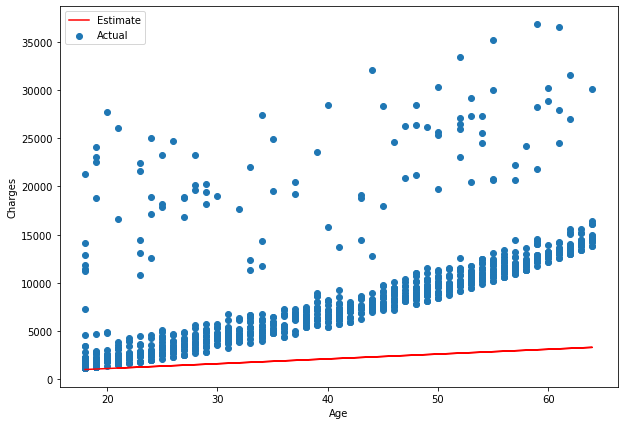

In [32]:
target = medical_non_smoker.charges
plt.figure(figsize=(10,7))
plt.plot(ages, estimated_charges, "r")
plt.scatter(ages, target)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(["Estimate", "Actual"])
plt.show()

The estimates are poor and the line does not fit the data. We can try, different values of $\omega$ and $b$ to move the line around. The following function takes $\omega$ and $b$ as input and creates the plot.

In [33]:
def parameters(w,b):
    ages = medical_non_smoker.age
    target = medical_non_smoker.charges

    estimated_charges = estimate_charges(ages, w, b)
    plt.figure(figsize=(10,7))
    plt.plot(ages, estimated_charges, "r")
    plt.scatter(ages, target)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(["Estimate", "Actual"])

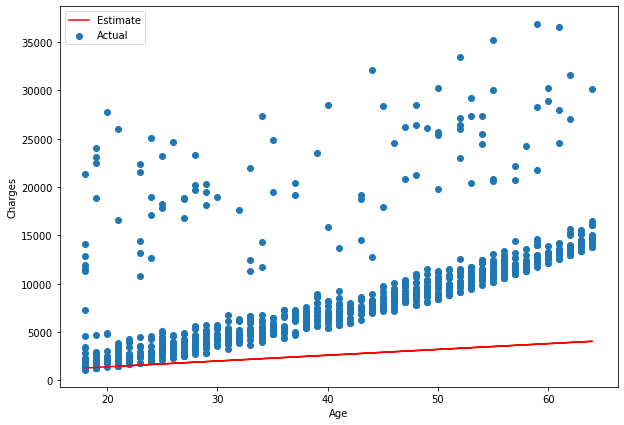

In [34]:
parameters(60,200)

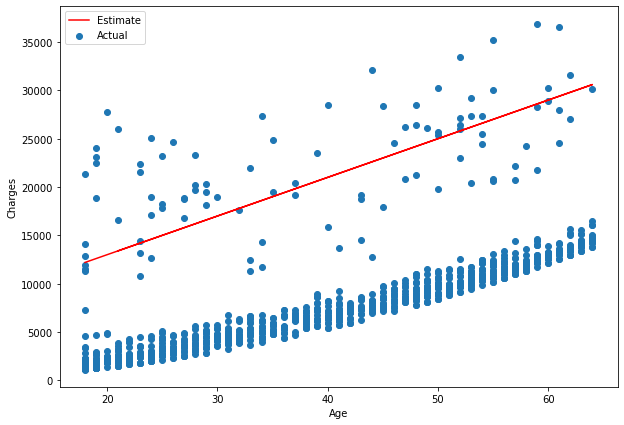

In [35]:
# Trying other points
parameters(400,5000)

## Loss/Cost Function

Computing the root mean squared error (RMSE).

$RMSE = \sqrt{\frac{\sum_{i=1}^{N}(Predicted_i-Actual_i)^2}{N}}$

Let's define a function to compute the RMSE

In [36]:
def RMSE(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

Let's compute the RMSE for out model with a sample set of weights

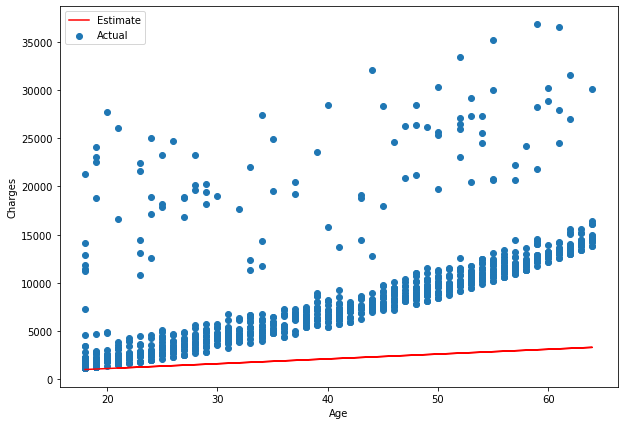

In [37]:
w = 50
b = 100
parameters(w,b)

In [38]:
targets = medical_non_smoker["charges"]
predicted = estimate_charges(medical_non_smoker.age, w, b)

In [39]:
RMSE(targets, predicted)

8461.949562575493

This result tells us that on average, each element in the prediction differs from the actual target by 8461.949 The result is called $loos$ because it indicates how bad the model is at predicting the target variables. The lower the loss, the better the model.

Let's modify the $parameters$ function to display the loss.

In [40]:
def parameters(w,b):
    ages = medical_non_smoker.age
    target = medical_non_smoker.charges
    predictions = estimate_charges(ages, w, b)

    estimated_charges = estimate_charges(ages, w, b)
    plt.figure(figsize=(10,7))
    plt.plot(ages, estimated_charges, "r")
    plt.scatter(ages, target)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(["Estimate", "Actual"])

    loss = RMSE(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  5166.348193785727


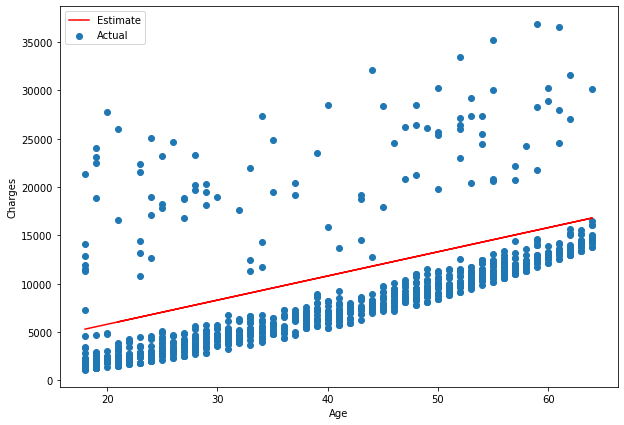

In [41]:
parameters(250,800)

## Linear Regression using Scikit-learn

We create a new model object.

In [42]:
lm = LinearRegression()

The input $X$ that is the training data must be a 2-d array, so we'll need to pass a dataframe, instead of a single column.

In [43]:
inputs = medical_non_smoker[["age"]]
targets = medical_non_smoker.charges
print("input.shape: ", inputs.shape)
print("targets.shape: ", targets.shape)

input.shape:  (1064, 1)
targets.shape:  (1064,)


Let's fit the model to the data

In [44]:
lm.fit(inputs, targets)

LinearRegression()

Now, we can make predictions using the model. 

In [45]:
lm.predict(np.array([[23],
                     [37],
                     [61]]))

c:\Users\Alanr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855,  7796.78921819, 14210.76312614])

We compute the predictions for the entire set of inputs.

In [46]:
predictions = lm.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

Let's compute the RMSE loss to evalute the model

In [47]:
RMSE(targets, predictions)

4662.505766636395

Considering the there are several outliers it is not boo bad that our prediction is off by $4000 on average.

In [48]:
# The values of w and b are the following, respectively:
lm.coef_, lm.intercept_ #w, b

(array([267.24891283]), -2091.4205565650864)

Let's visualize the line created by this parameters

RMSE Loss:  4662.505766636395


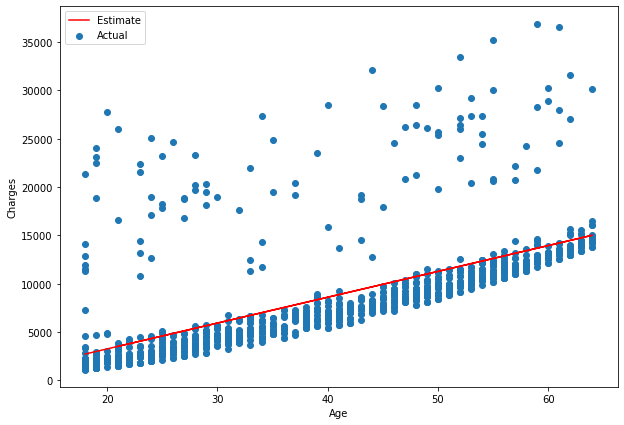

In [49]:
parameters(lm.coef_, lm.intercept_)

The line is quite close to the points. It is slightly above the cluster of points, because it's also trying to account for the outliers.

## Linear Regression using Multiple Features
Adding another feature like BMI is fairly straightforward. So, the formula is like:

$charges = \omega_1 \times age + \omega_2 \times bmi + b$

In [50]:
# Create inputs and targets
inputs, targets = medical_non_smoker[["age", "bmi"]], medical_non_smoker["charges"]

# Create and train the model
lm = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = lm.predict(inputs)

# Compute loss to evaluate the model
loss = RMSE(targets, predictions)
print("Loss: ", loss)

Loss:  4662.3128354612945


Adding the BMI does not seem that the loss decreases. Due to the BMI has a very correlation with charges, especially for non smokers.

In [51]:
medical_non_smoker.charges.corr(medical_non_smoker.bmi)

0.08403654312833271

We'll see graphically that there is no correlation between these variables.

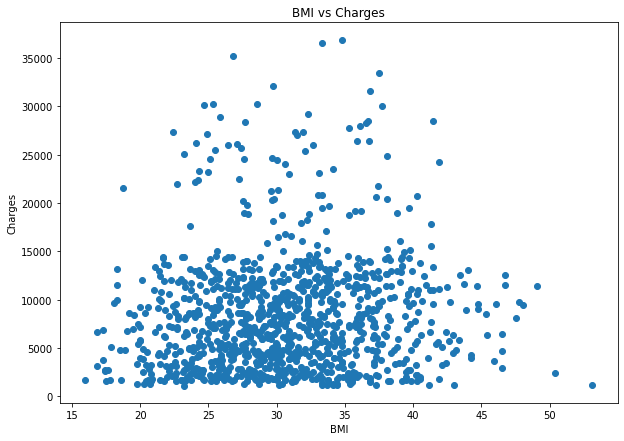

In [52]:
plt.figure(figsize=(10,7))
plt.scatter(medical_non_smoker.bmi, medical_non_smoker.charges)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI vs Charges")
plt.show()

Let's visualize the relationshio between all 3 variables: "age", "bmi" and "charges".

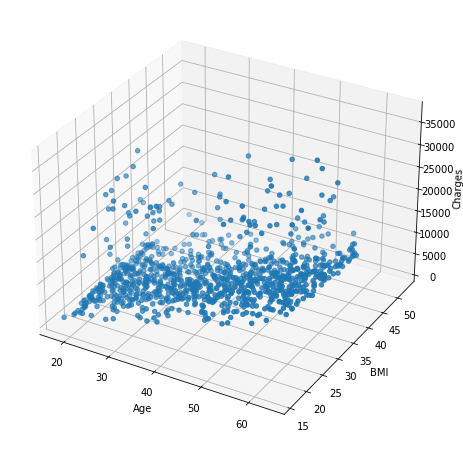

In [53]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(medical_non_smoker.age, medical_non_smoker.bmi, medical_non_smoker.charges)
ax.set_xlabel("Age")
ax.set_ylabel("BMI")
ax.set_zlabel("Charges")
plt.show()

Let's check the parameters of the model

In [54]:
lm.coef_, lm.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

The first coefficient corresponds to age, and the second to BMI and clearly, BMI has a much lower weightage. It has a tiny contribution. 

We add the final column "children", which seems to have some correlation with "charges".

$charges = \omega_1 \times age + \omega_2 \times age bmi + \omega_3 \times children + b$

In [55]:
medical_non_smoker.charges.corr(medical_non_smoker.children)

0.13892870453542205

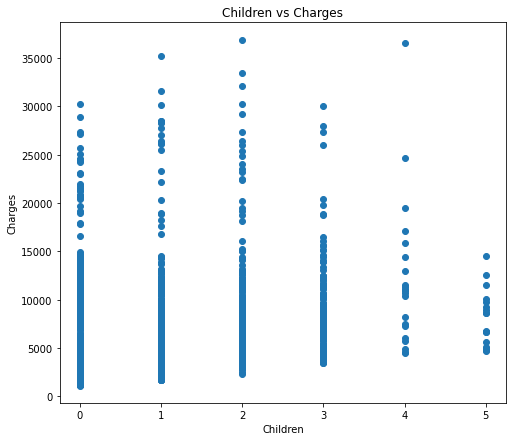

In [56]:
plt.figure(figsize = (8,7))
plt.scatter(medical_non_smoker.children, medical_non_smoker.charges)
plt.xlabel("Children")
plt.ylabel("Charges")
plt.title("Children vs Charges")
plt.show()

In [57]:
# Create inputs and targets
inputs, targets = medical_non_smoker[["age", "bmi", "children"]], medical_non_smoker["charges"]

# Create and train the model
lm = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = lm.predict(inputs)

# Compute loss to evaluate the model
loss = RMSE(targets, predictions)
print("Loss: ", loss)

Loss:  4608.470405038246


We don't see a big reduction in the loss, even though it's greater than in the case of BMI.

## Binary Categories

The "smoker" column has two values. Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".

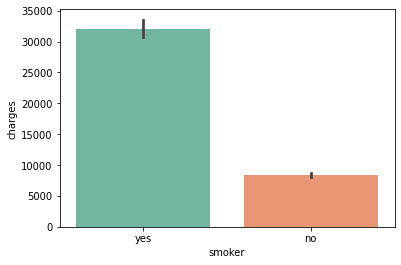

In [58]:
sns.barplot(data = medical_data, x = "smoker", y = "charges", palette="Set2")
plt.show()

In [59]:
smoker_codes = {"no": 0, "yes": 1}
medical_data["smoker_code"] = medical_data.smoker.map(smoker_codes)

In [60]:
medical_data.charges.corr(medical_data.smoker_code)

0.7872514304984778

In [61]:
medical_data.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


With this, we can use the "smoker" column for our model:

$charges = \omega_1 \times age + \omega_2 \times bmi + \omega_3 \times children + \omega_4 \times smoker + b$

In [62]:
# First, we need to know the loss without smoker
inputs, targets = medical_data[["age", "bmi", "children"]], medical_data["charges"]

# Create and train the model
lm = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = lm.predict(inputs)

# Compute loss to evaluate the model
loss = RMSE(targets, predictions)
print("Loss: ", loss)

Loss:  11355.317901125973


In [63]:
# With the "smoker_code" column
# Create inputs and targets
inputs, targets = medical_data[["age", "bmi", "children", "smoker_code"]], medical_data["charges"]

# Create and train the model
lm = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = lm.predict(inputs)

# Compute loss to evaluate the model
loss = RMSE(targets, predictions)
print("Loss: ", loss)

Loss:  6056.439217188081


The loss reduces from 11355.317 to 6056.439, almost by 50%. 
Let's check these for the "sex" column

$charges = \omega_1 \times age + \omega_2 \times bmi + \omega_3 \times children + \omega_4 \times smoker + \omega_5 \times sex + b$

In [64]:
sex_codes = {"female": 0, "male": 1}
medical_data["sex_code"] = medical_data.sex.map(sex_codes)

In [65]:
medical_data.charges.corr(medical_data.sex_code)

0.05729206220202533

In [66]:
# Create inputs and targets
inputs, targets = medical_data[["age", "bmi", "children", "smoker_code", "sex_code"]], medical_data["charges"]

# Create and train the model
lm = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = lm.predict(inputs)

# Compute loss to evaluate the model
loss = RMSE(targets, predictions)
print("Loss: ", loss)

Loss:  6056.100708754546


This column have an impact on the loss

### One-hot Encoding
The "region" column contains 4 values, so we use hot encoding to create a new column for each region.

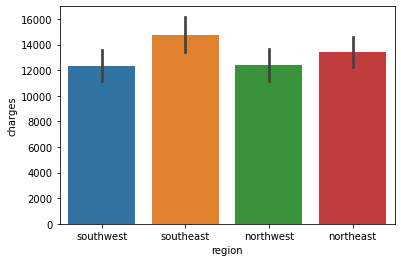

In [67]:
sns.barplot(data = medical_data, x = "region", y = "charges")
plt.show()

In [68]:
enc = preprocessing.OneHotEncoder()
enc.fit(medical_data[["region"]])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [69]:
one_hot = enc.transform(medical_data[["region"]]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [70]:
medical_data[["northeast", "northwest", "southeast", "southwest"]] = one_hot
medical_data.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


Finally, we include the region columns into our model.

$charges = \omega_1  \times age + \omega_2 \times bmi + \omega_3 \times children + \omega_4 \times smoker + \omega_5 \times sex + \omega_6 \times region + b$

In [71]:
# Create inputs and targets
inputs, targets = medical_data[["age", "bmi", "children", "smoker_code", "sex_code", "northeast", "northwest", "southeast", "southwest"]], medical_data["charges"]

# Create and train the model
lm = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = lm.predict(inputs)

# Compute loss to evaluate the model
loss = RMSE(targets, predictions)
print("Loss: ", loss)

Loss:  6041.6796511744515


Region also leads to a fairly small reduction in the loss.

## Model Improvements

### Feature Scaling

We need to explain the rationale behind the predictions our model.

To compare the importance of each feature in the model, our first instinct might be to compare their weights.

In [72]:
columns = inputs.columns.values

In [73]:
weight = pd.DataFrame({
    "feature" : np.append(columns, "b"),
    "weight" : np.append(lm.coef_, lm.intercept_)
})
weight

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,b,-12525.547811


We can see that BMI and "northeast" have a higer weight than age (BMI is in [15,40] and "northeast" is in {0,1}).

1. We can not compare the weights of different column to identify which features are important.
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, we scale or standardize the values in numeric column by subtracting the mean and dividing by the standard deviation.

In [74]:
numeric_cols = ["age", "bmi", "children"]
scaler = StandardScaler()
scaler.fit(medical_data[numeric_cols])

StandardScaler()

In [75]:
scaled_inputs = scaler.transform(medical_data[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [76]:
categorical_cols = ["smoker_code", "sex_code", "northeast", "northwest", "southeast", "southwest"]
categorical_data = medical_data[categorical_cols].values
inputs = np.concatenate((scaled_inputs, categorical_data), axis = 1)
targets = medical_data.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = RMSE(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174452


Now, we can compare the weights in the formula

In [77]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + categorical_cols, "b"),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,b,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


With this, we can say that the most important features are:

1. Smoker
2. Age
3. BMI

### Creating a Test Set


In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(inputs, targets, test_size=0.1)

In [79]:
# Create and train the model
model = LinearRegression().fit(X_train, Y_train)

# Generate predictions
predictions_test = model.predict(X_test)

# Compute loss to evalute the model
loss = RMSE(Y_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6526.814376289501


Let's compare this with the training loss

In [80]:
# Generate predictions
predictions_train = model.predict(X_train)

# Compute loss to evalute the model
loss = RMSE(Y_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 5986.588764046731


### Calculating R2

In [81]:
# for training data
print("R2 training data: {}%".format(model.score(X_train, Y_train)*100))

R2 training data: 74.89659951808393%


In [82]:
# for testing data
print("R2 testing data: {}%".format(model.score(X_test, Y_test)*100))

R2 testing data: 76.04186058253737%


### Calculating sum of squares error (SSE), residual Standard Error (RSE), and error

In [95]:
# for training data
SSE = np.sum((Y_train-model.predict(X_train))**2)
RSE = np.sqrt(SSE/(len(medical_data)-X_train.shape[1]-1))
charges_mean = np.mean(Y_train)
error = RSE/charges_mean
print("The Sum of Squares Error (SSE) is {},\nResidual Standard Error (RSE): {},\nError for training data: {:2.3f}%".format(SSE, RSE, error*100))

The Sum of Squares Error (SSE) is 43150451015.89192,
Residual Standard Error (RSE): 5700.2464420337665,
Error for training data: 43.520%


In [94]:
# for testing data
SSE = np.sum((Y_test-model.predict(X_test))**2)
RSE = np.sqrt(SSE/(len(medical_data)-X_train.shape[1]-1))
charges_mean = np.mean(Y_test)
error = RSE/charges_mean
print("The Sum of Squares Error (SSE) is {},\nResidual Standard Error (RSE): {},\nError for training data: {:2.3f}%".format(SSE, RSE, error*100))

The Sum of Squares Error (SSE) is 5708306990.940267,
Residual Standard Error (RSE): 2073.264078442745,
Error for training data: 13.990%
